- **52100744 - Nguyễn Thế Anh**
- **52100782 - Lê Thị Phi Du**
- **52100910 - Nguyễn Quang Lợi**

In [2]:
# REMOVE this cell when submission
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_Final
%pwd
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_Final
'Copy of House appliances energy prediction.ipynb'
 energydata_complete.csv
'House appliances energy prediction.ipynb'
 US_pollution_2018_2021.csv
'US pollution prediction from 2018 to 2023.ipynb'


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import \
    mean_absolute_error as MAE, \
    r2_score as R2, \
    mean_squared_error as MSE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data exploration and preprocessing

* **Problem Statement**: Develop a predictive model for energy used in house.

* **Dataset**: "Appliances Energy Prediction" comprising data on air quality with 29 features (details below).
* **Technique**: Regression

In [4]:
filename = 'energydata_complete.csv'

# Read file and show number of rows and columns
df = pd.read_csv(filename)
df.shape

(19968, 29)

In [5]:
# Explore the first 5 rows in the dataset
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
# types and columns
types = df.dtypes
columns = list(df.columns)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19968 non-null  object 
 1   Appliances   19968 non-null  int64  
 2   lights       19968 non-null  int64  
 3   T1           19968 non-null  float64
 4   RH_1         19968 non-null  float64
 5   T2           19968 non-null  float64
 6   RH_2         19968 non-null  float64
 7   T3           19968 non-null  float64
 8   RH_3         19968 non-null  float64
 9   T4           19968 non-null  float64
 10  RH_4         19968 non-null  float64
 11  T5           19968 non-null  float64
 12  RH_5         19968 non-null  float64
 13  T6           19968 non-null  float64
 14  RH_6         19968 non-null  float64
 15  T7           19968 non-null  float64
 16  RH_7         19968 non-null  float64
 17  T8           19968 non-null  float64
 18  RH_8         19968 non-null  float64
 19  T9  

**Variables Explaination**

| Date Time                         | Appliances (Wh)                     |
|-----------------------------------|-------------------------------------|
| Lights                            | Energy Use of Light Fixtures (Wh)   |
| T1                                | Temperature in Kitchen Area (°C)    |
| RH_1                              | Humidity in Kitchen Area (%)        |
| T2                                | Temperature in Living Room Area (°C)|
| RH_2                              | Humidity in Living Room Area (%)    |
| T3                                | Temperature in Laundry Room Area (°C)|
| RH_3                              | Humidity in Laundry Room Area (%)   |
| T4                                | Temperature in Office Room (°C)    |
| RH_4                              | Humidity in Office Room (%)         |
| T5                                | Temperature in Bathroom (°C)       |
| RH_5                              | Humidity in Bathroom (%)            |
| T6                                | Temperature Outside (North Side) (°C)|
| RH_6                              | Humidity Outside (North Side) (%)   |
| T7                                | Temperature in Ironing Room (°C)   |
| RH_7                              | Humidity in Ironing Room (%)        |
| T8                                | Temperature in Teenager Room 2 (°C)|
| RH_8                              | Humidity in Teenager Room 2 (%)     |
| T9                                | Temperature in Parents Room (°C)   |
| RH_9                              | Humidity in Parents Room (%)        |
| To                                | Temperature Outside (Chievres Weather Station) (°C)|
| Pressure (Chievres Weather Station)| mm Hg                               |
| RH_out                            | Humidity Outside (Chievres Weather Station) (%)|
| Wind Speed (Chievres Weather Station)| m/s                                |
| Visibility (Chievres Weather Station)| km                                |
| Tdewpoint (Chievres Weather Station)| °C                                |
| rv1                               | Random Variable 1 (Nondimensional)  |
| rv2                               | Random Variable 2 (Nondimensional)  |



In [8]:
 # Check missing data exists or not
print('Number of missing data:', df.isnull().sum().sum())

# Check duplicates
print('Number of duplicated data rows:', df.duplicated().sum())

Number of missing data: 0
Number of duplicated data rows: 233


In [9]:
# Remove duplicates
df = df.drop_duplicates()
print('After removing duplicates:')
print('- Duplicates:', df.duplicated().sum())
print('- Data shape:', df.shape)

After removing duplicates:
- Duplicates: 0
- Data shape: (19735, 29)


In [10]:
# Show the statistics of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


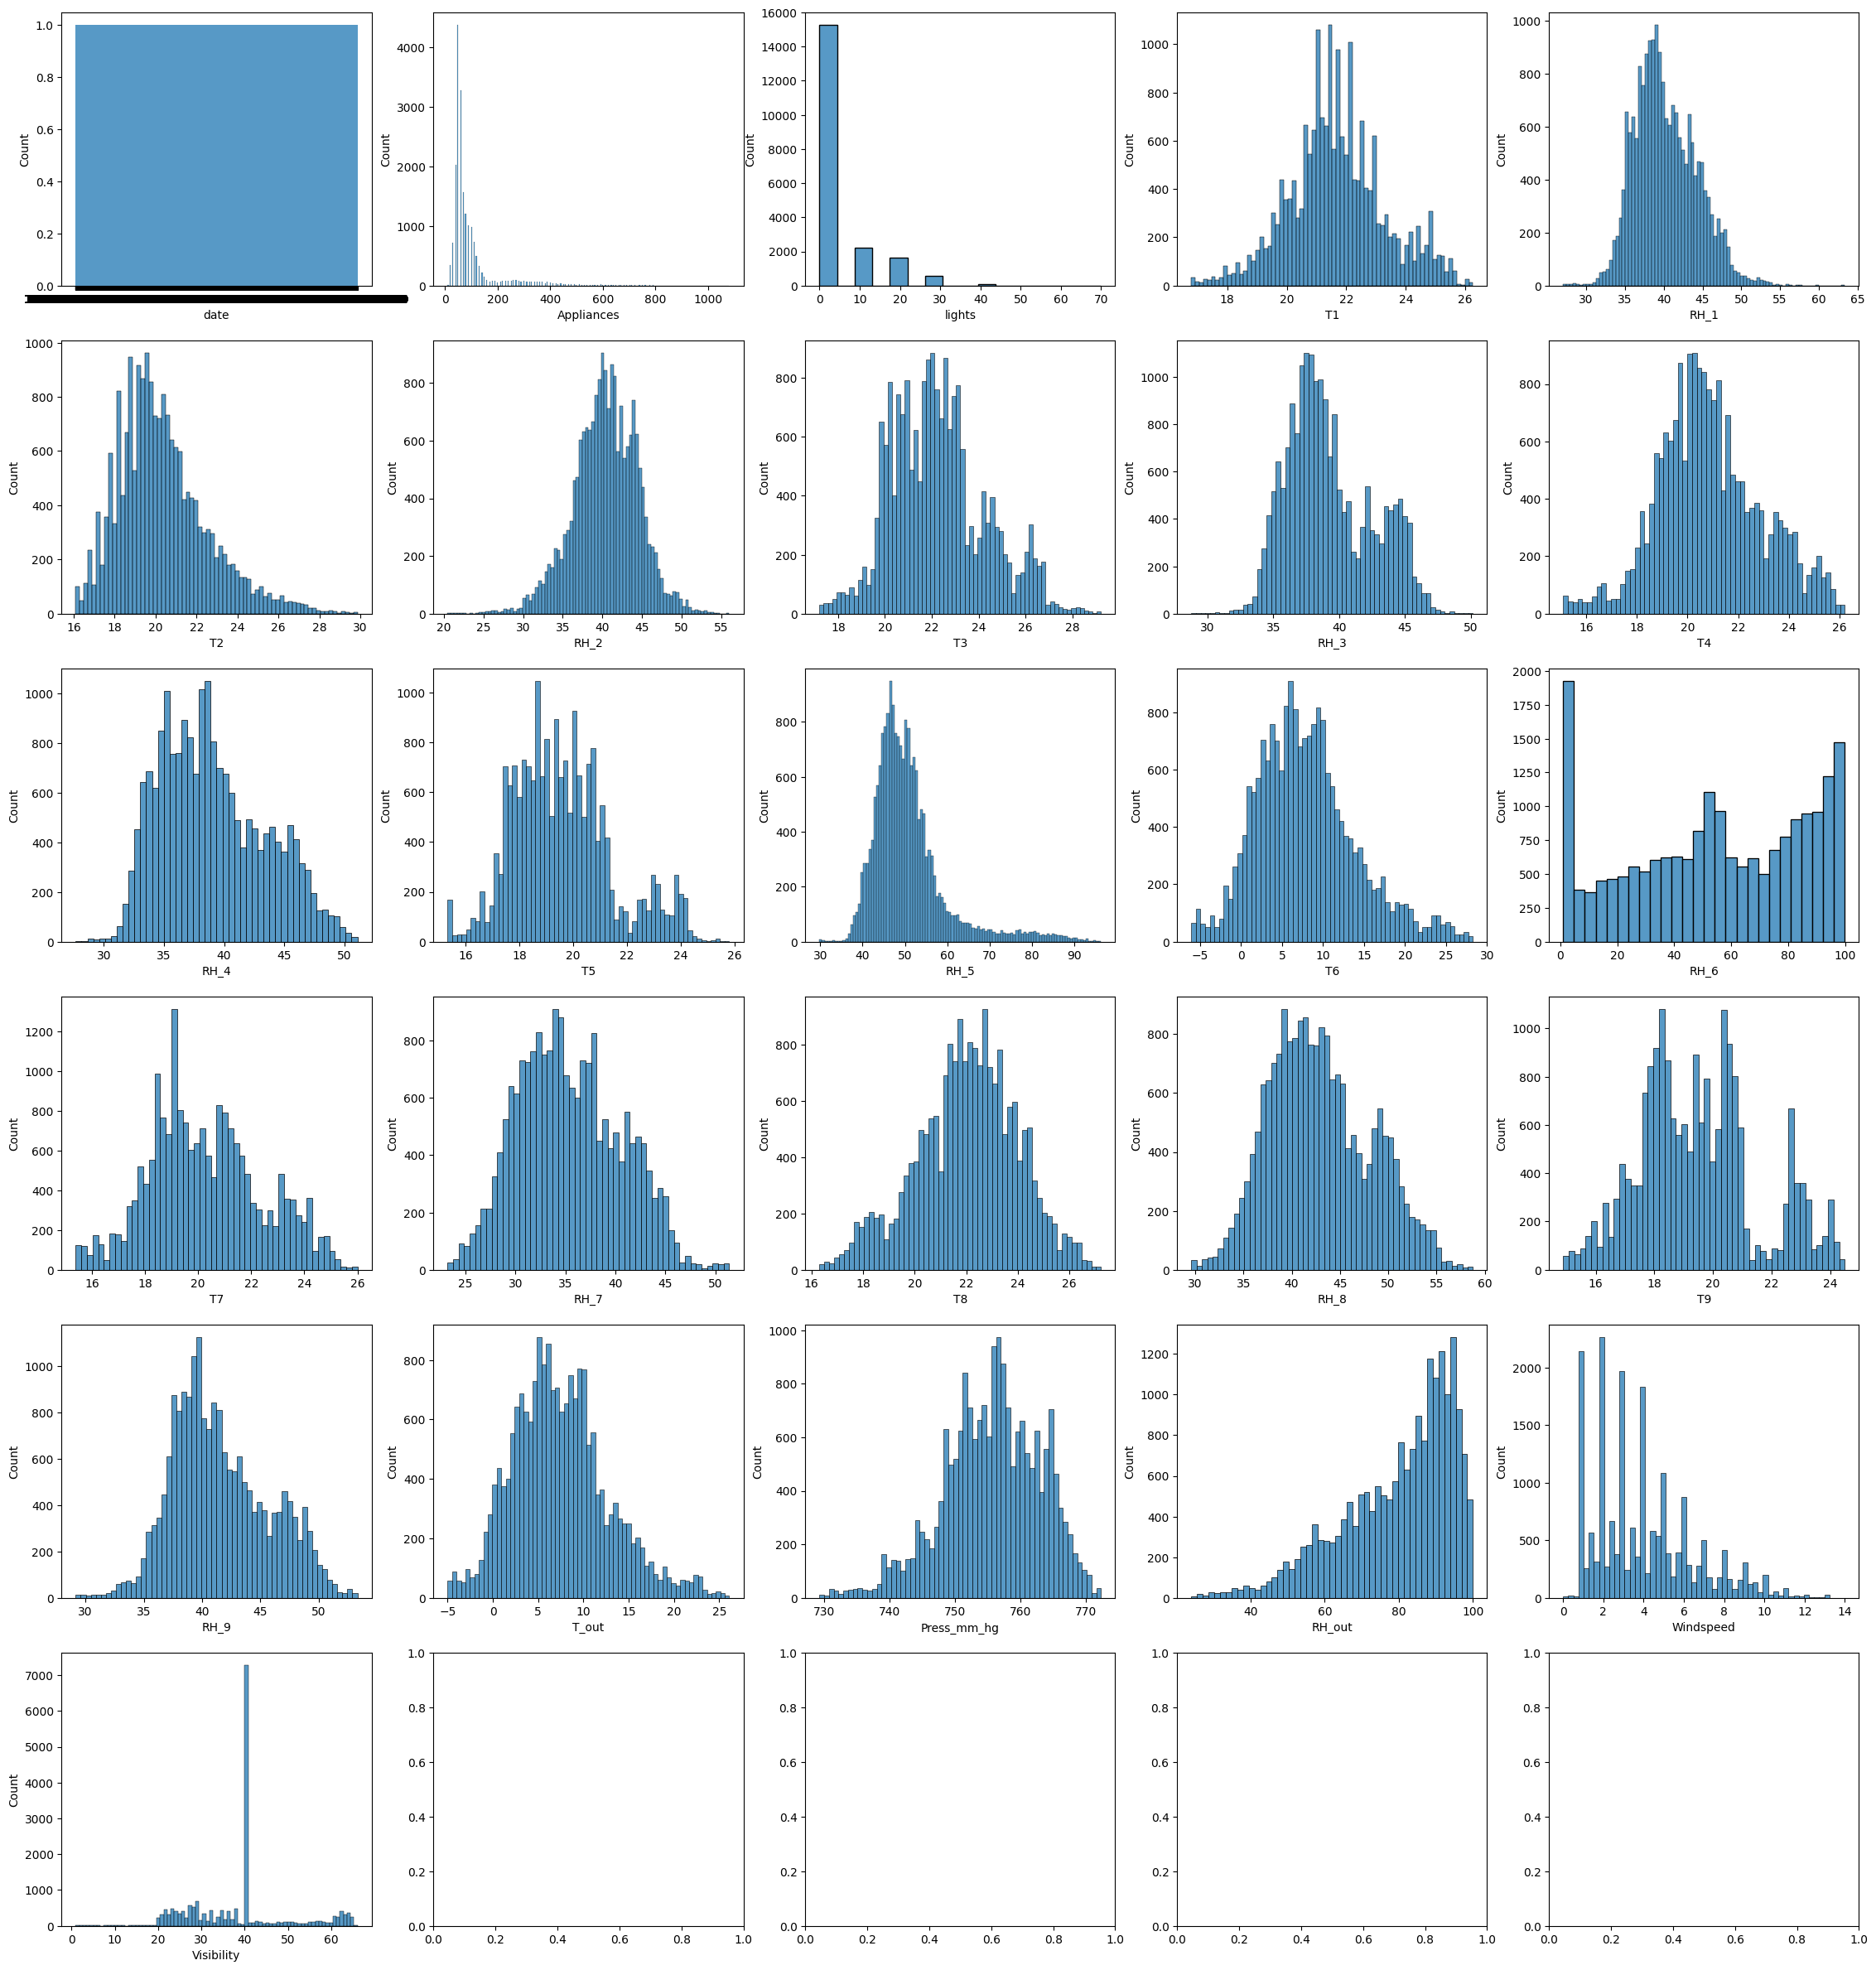

In [11]:
df_visual = df.drop(['rv1', 'rv2'], axis=1)

# Distribution plot for each features
ls = []
colName = [j for j in df_visual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=df_visual)

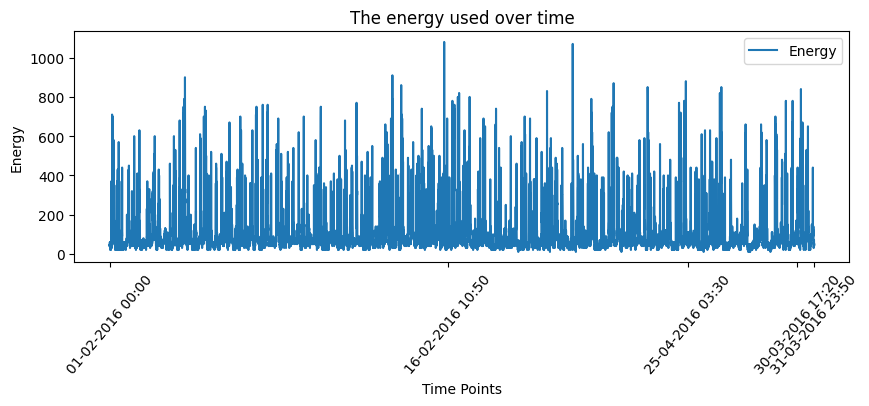

In [12]:
# Plot energy used over time
df_sorted = df.sort_values(by='date')
plt.figure(figsize=(10, 3))

time_points = df_sorted['date'].values
energy = df_sorted['Appliances'].values

plt.plot(time_points, energy, label='Energy')
plt.xlabel('Time Points')
plt.ylabel('Energy')
plt.legend()
plt.title('The energy used over time')
selected_time_points = [time_points[0]]
selected_time_points.extend(list(np.random.choice(time_points, size=3, replace=False)))
selected_time_points.append(time_points[-1])
plt.xticks(selected_time_points, rotation=50)
plt.show()

# Data preprocessing and Features elimination

In [13]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [14]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
df = scaler.fit_transform(df[numeric_cols])
df = pd.DataFrame(df, columns=numeric_cols)

scaler = MinMaxScaler()
df = scaler.fit_transform(df[numeric_cols])
df = pd.DataFrame(df, columns=numeric_cols)

In [15]:
target = ['Appliances']

X = df.drop(target, axis=1).values
y = df[target].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (13814, 27)
y_train shape: (13814, 1)
X_test shape: (5921, 27)
y_test shape: (5921, 1)


# Solve the problem by using basic machine learning models

**Bagging**

In [46]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 0.013613102784795054
Mean Squared Error: 0.0009190178264329924
R-squared Score: 0.9007379277465604

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 0.03434378191357547
Mean Squared Error: 0.004881141156770685
R-squared Score: 0.4575731605035964


**AdaBoost**

In [47]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 0.001882148544954394
Mean Squared Error: 2.292666011813135e-05
R-squared Score: 0.9975237174647538

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 0.026916708626195055
Mean Squared Error: 0.004488584070262532
R-squared Score: 0.5011968732620712


**Gradient Boosting**

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.04241754766879487
Mean Squared Error: 0.005991277258672878
R-squared Score: 0.3528889440055507

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.044700646688568685
Mean Squared Error: 0.006655934396491186
R-squared Score: 0.26034561537394807


**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))

<ipython-input-49-ea221e235954>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.01216398371420569
Mean Squared Error: 0.0006581272639049404
R-squared Score: 0.9289164212676413

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.03202344893117638
Mean Squared Error: 0.0043808501811540826
R-squared Score: 0.5131690230317398


**KNN**

In [50]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
y_pred_train_knn = knn_reg.predict(X_train)

print("KNN Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_knn))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_knn))
print("R-squared Score:", r2_score(y_train, y_pred_train_knn))

print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))

KNN Regressor Metrics on Training Set:
Mean Absolute Error: 0.031208620808633795
Mean Squared Error: 0.004105411143239487
R-squared Score: 0.5565792024818499

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 0.03941396613037391
Mean Squared Error: 0.006452666753297546
R-squared Score: 0.282934149843284


**Linear Regression**

In [51]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)
y_pred_train_linear = linear_reg.predict(X_train)

print("Linear Regression Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_linear))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_linear))
print("R-squared Score:", r2_score(y_train, y_pred_train_linear))

print("\nLinear Regression Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))


Linear Regression Metrics on Training Set:
Mean Absolute Error: 0.04955968902701749
Mean Squared Error: 0.007747329772309389
R-squared Score: 0.1632197053075667

Linear Regression Metrics on Test Set:
Mean Absolute Error: 0.04946049710364219
Mean Squared Error: 0.007493801676453194
R-squared Score: 0.16723589246482384


**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=42)

decision_tree_reg.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_train_decision_tree = decision_tree_reg.predict(X_train)

print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 2.5115440509292126e-20
Mean Squared Error: 3.485467540877436e-37
R-squared Score: 1.0

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.03841546088924736
Mean Squared Error: 0.008023982582914833
R-squared Score: 0.10831844996177031


In [53]:
model_names = ['Bagging', 'AdaBoost','Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
mae_scores = [mean_absolute_error(y_test, y_pred_bagging),
              mean_absolute_error(y_test, y_pred_adaboost),
              mean_absolute_error(y_test, y_pred_linear),
              mean_absolute_error(y_test, y_pred_decision_tree),
              mean_absolute_error(y_test, y_pred_knn),
              mean_absolute_error(y_test, y_pred_random_forest),
              mean_absolute_error(y_test, y_pred_gradient_boost)]
mse_scores = [mean_squared_error(y_test, y_pred_bagging),
              mean_squared_error(y_test, y_pred_adaboost),
              mean_squared_error(y_test, y_pred_linear),
              mean_squared_error(y_test, y_pred_decision_tree),
              mean_squared_error(y_test, y_pred_knn),
              mean_squared_error(y_test, y_pred_random_forest),
              mean_squared_error(y_test, y_pred_gradient_boost)]
r2_scores = [r2_score(y_test, y_pred_bagging),
             r2_score(y_test, y_pred_adaboost),
             r2_score(y_test, y_pred_linear),
             r2_score(y_test, y_pred_decision_tree),
             r2_score(y_test, y_pred_knn),
             r2_score(y_test, y_pred_random_forest),
             r2_score(y_test, y_pred_gradient_boost)]

data = {
    'Model': model_names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R-squared': r2_scores
}

comparison_df = pd.DataFrame(data)
print(comparison_df)

               Model       MAE       MSE  R-squared
0            Bagging  0.034344  0.004881   0.457573
1           AdaBoost  0.026917  0.004489   0.501197
2  Linear Regression  0.049460  0.007494   0.167236
3      Decision Tree  0.038415  0.008024   0.108318
4                KNN  0.039414  0.006453   0.282934
5      Random Forest  0.032023  0.004381   0.513169
6  Gradient Boosting  0.044701  0.006656   0.260346


**Summary**

Based on the performance benchmark, the AdaBoost model appears to be the best among the evaluated models
- AdaBoost has the lowest values for both MAE and MSE, indicating high accuracy in predictions.
- AdaBoost also has the highest R-squared value, approaching 1, indicating the model's ability to explain variance in the data well.

# Solve the problem by using FFNN and LSTM

In [54]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [55]:
# Plot the training process
def plot_training_process(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Process')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

## Feed Forward Neural Network (FFNN)

In [56]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=16
)

Epoch 1/20
777/777 [==============================] - 2s 2ms/step - loss: 0.0125 - val_loss: 0.0079
Epoch 2/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0086 - val_loss: 0.0076
Epoch 3/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 4/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0081 - val_loss: 0.0076
Epoch 5/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 6/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 7/20
777/777 [==============================] - 2s 2ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 8/20
777/777 [==============================] - 2s 3ms/step - loss: 0.0079 - val_loss: 0.0070
Epoch 9/20
777/777 [==============================] - 2s 3ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 10/20
777/777 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.0067

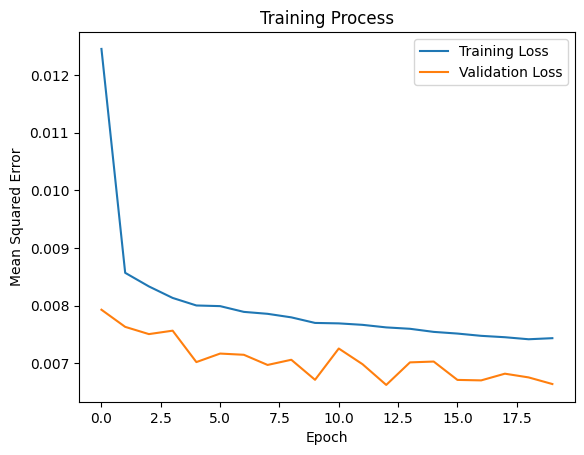

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                896       
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
plot_training_process(history)
model.summary()

In [58]:
# Evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

186/186 [==============================] - 0s 1ms/step
Mean Squared Error: 0.007232243191809292
Mean Absolute Error: 0.0508499628598931
R-squared Score: 0.1963021164505946


## Long Short Time Memory (LSTM)

In [59]:
X_train.shape

(13814, 27)

In [60]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [61]:
X_train_reshaped.shape

(13814, 1, 27)

In [62]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mean_squared_error')
history = model.fit(
    X_train_reshaped, y_train,
    validation_split = 0.1,
    epochs=20,
    batch_size=32
)

Epoch 1/20
389/389 [==============================] - 13s 14ms/step - loss: 0.0092 - val_loss: 0.0078
Epoch 2/20
389/389 [==============================] - 3s 7ms/step - loss: 0.0086 - val_loss: 0.0077
Epoch 3/20
389/389 [==============================] - 3s 7ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 4/20
389/389 [==============================] - 3s 7ms/step - loss: 0.0083 - val_loss: 0.0073
Epoch 5/20
389/389 [==============================] - 3s 8ms/step - loss: 0.0081 - val_loss: 0.0068
Epoch 6/20
389/389 [==============================] - 3s 9ms/step - loss: 0.0081 - val_loss: 0.0069
Epoch 7/20
389/389 [==============================] - 2s 6ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 8/20
389/389 [==============================] - 3s 6ms/step - loss: 0.0080 - val_loss: 0.0070
Epoch 9/20
389/389 [==============================] - 2s 6ms/step - loss: 0.0078 - val_loss: 0.0068
Epoch 10/20
389/389 [==============================] - 3s 7ms/step - loss: 0.0077 - val_loss: 0.00

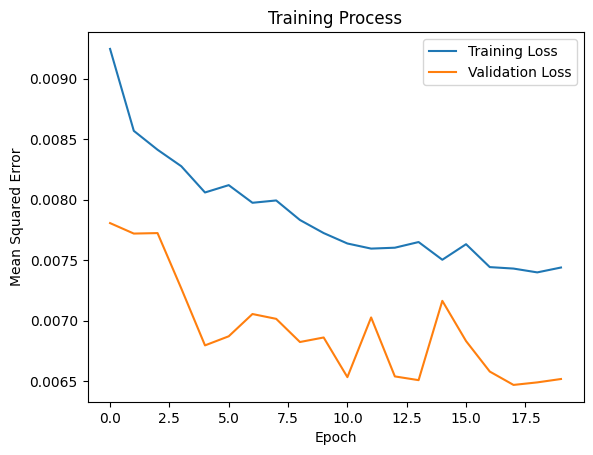

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 1, 64)             23552     
                                                                 
 lstm_8 (LSTM)               (None, 1, 16)             5184      
                                                                 
 lstm_9 (LSTM)               (None, 1, 32)             6272      
                                                                 
 lstm_10 (LSTM)              (None, 8)                 1312      
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36329 (141.91 KB)
Trainable params: 36329 (141.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
plot_training_process(history)
model.summary()

In [64]:
# Evaluate the model
y_pred = model.predict(X_test_reshaped).flatten()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

186/186 [==============================] - 2s 2ms/step
Mean Squared Error: 0.007166046541532206
Mean Absolute Error: 0.045649166193174454
R-squared Score: 0.20365835521563047


# Apply techniques to avoid Overfitting in the models


**Bagging**

Adjust hyperparameters

In [65]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=200, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 0.04657930948418124
Mean Squared Error: 0.006881097448520474
R-squared Score: 0.25678047533738446

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 0.04800138068098379
Mean Squared Error: 0.007299196306572727
R-squared Score: 0.1888618140153342


**AdaBoost**

Adjust hyperparameters

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 0.07730479327561877
Mean Squared Error: 0.008885978643620193
R-squared Score: 0.04023553320065998

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 0.079869315071474
Mean Squared Error: 0.009871101283748808
R-squared Score: -0.09694641062893239


**Gradient Boosting**

Adjust hyperparameters

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
gradient_boost_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.033320721516874735
Mean Squared Error: 0.00367986708272197
R-squared Score: 0.6025417334221479

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.03940628432796306
Mean Squared Error: 0.00561325752207472
R-squared Score: 0.37621522525425144


**Random Forest**

Adjust hyperparameters

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))


<ipython-input-68-3cb87a08b41e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_reg.fit(X_train, y_train)


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.03279598653541893
Mean Squared Error: 0.003928993758726651
R-squared Score: 0.5756338439312372

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.03914206600366896
Mean Squared Error: 0.005707484954084375
R-squared Score: 0.3657440082791058


**KNN**

Hyperparameter Tuning, Cross-Validation

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning to find optimal n_neighbors
param_grid = {'n_neighbors': range(3, 11)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_
print(grid_search.best_params_)
knn_reg = grid_search.best_estimator_

# Cross-validation to evaluate model generalization
scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='r2')
#print("Cross-validation R-squared scores:", scores)

# Train the model on the entire training set
knn_reg.fit(X_train, y_train)

# Evaluate on test set
y_pred_knn = knn_reg.predict(X_test)
print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))


{'n_neighbors': 5}

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 0.03941396613037391
Mean Squared Error: 0.006452666753297546
R-squared Score: 0.282934149843284


**Linear Regression**

Hyperparameter tuning with regularization

In [70]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE

# Hyperparameter tuning with regularization
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)  # Using Ridge regression
grid_search.fit(X_train, y_train)
linear_reg = grid_search.best_estimator_

# Feature selection with RFE
rfe = RFE(linear_reg, n_features_to_select=10)  # Adjust n_features_to_select
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the model on selected features
linear_reg.fit(X_train_selected, y_train)

# Evaluate on test set
y_pred_linear = linear_reg.predict(X_test_selected)
print("\nLinear Regression Metrics on Test Set (After Overfitting Prevention):")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))



Linear Regression Metrics on Test Set (After Overfitting Prevention):
Mean Absolute Error: 0.04960643775321721
Mean Squared Error: 0.007536632272155786
R-squared Score: 0.16247625452063552


**Decision Tree**

Define the parameter grid

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree regressor with the best parameters
best_decision_tree_reg = DecisionTreeRegressor(**best_params, random_state=42)

best_decision_tree_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_pred_train_decision_tree = best_decision_tree_reg.predict(X_train)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 0.04730537195828431
Mean Squared Error: 0.007314364026307739
R-squared Score: 0.20998384407263082

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.04923317123305231
Mean Squared Error: 0.008045939086358886
R-squared Score: 0.10587848840625791


Feed Forward Neural Network (FFNN)

Use L2 Regularization, Early Stopping techniques

Epoch 1/200
389/389 [==============================] - 5s 6ms/step - loss: 0.0113 - val_loss: 0.0080
Epoch 2/200
389/389 [==============================] - 2s 6ms/step - loss: 0.0091 - val_loss: 0.0077
Epoch 3/200
389/389 [==============================] - 1s 4ms/step - loss: 0.0089 - val_loss: 0.0076
Epoch 4/200
389/389 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0072
Epoch 5/200
389/389 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0075
Epoch 6/200
389/389 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 7/200
389/389 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0073


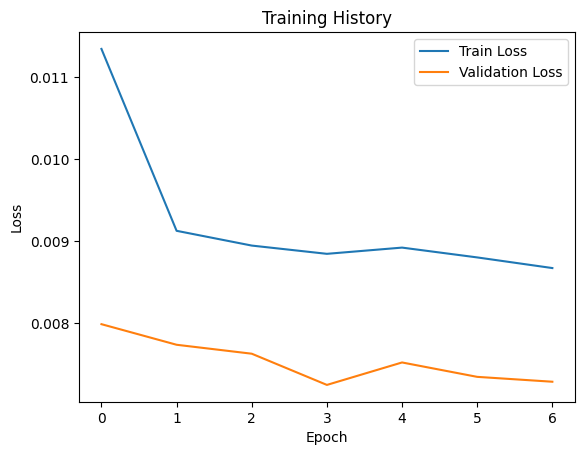

186/186 [==============================] - 0s 2ms/step
Mean Squared Error: 0.007958567780382172
R-squared Score: 0.11558780428987736


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Long Short Time Memory (LSTM)

Use Early Stopping, Dropout techniques

In [73]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add Dropout
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add Dropout
model.add(Dense(1))

model.compile(optimizer=Adam(0.01), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.1,
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping]
)

y_pred = model.predict(X_test_reshaped).flatten()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Epoch 1/200
777/777 [==============================] - 10s 6ms/step - loss: 0.0091 - val_loss: 0.0078
Epoch 2/200
777/777 [==============================] - 3s 4ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 3/200
777/777 [==============================] - 5s 6ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 4/200
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0071
Epoch 5/200
777/777 [==============================] - 3s 4ms/step - loss: 0.0084 - val_loss: 0.0069
Epoch 6/200
777/777 [==============================] - 3s 4ms/step - loss: 0.0085 - val_loss: 0.0068
Epoch 7/200
777/777 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 8/200
777/777 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 9/200
186/186 [==============================] - 2s 3ms/step
Mean Squared Error: 0.007659272513379054
R-squared Score: 0.14884760574666211


# Methods to Improve Prediction Model Accuracy

### 1. Tuning Hyperparameters

Adjusting the model's parameters to optimize performance. For example:
- Changing the number of trees in a RandomForest model.
- Increasing LSTM layers and adjusting the learning rate in a Neural Network model.

### 2. Feature Engineering

Creating or selecting better features can enhance the model. This includes:
- Removing or adding new features.
- Feature combination.
- Handling missing data.
- Using better encoding techniques for classification data.

### 3. Cross-Validation

Using cross-validation to evaluate the model on various data portions and prevent overfitting.

### 4. Ensemble Learning

Combining multiple predictive models to create a stronger one. For instance: Bagging, Boosting, Stacking.

### 5. Regularization

Using regularization techniques like L1 or L2 regularization to prevent overfitting and enhance the model's generalization.

### 6. Early Stopping

Halting the training process when there isn't significant improvement on the validation set to prevent overfitting.

### 7. Handling Missing Data

Dealing with missing data sensibly instead of discarding it or filling it with average values.

### 8. Feature Scaling

Scaling features can enhance the model's performance, especially with models like KNN, Neural Networks.

### 9. Adding Data

If possible, adding new data or expanding the dataset can improve the model's predictive ability.

Each improvement step can be applied to specific problems and datasets, often requiring experimentation and evaluation to determine the most effective approach for your model.


# Conclusion

The methods outlined for improving the accuracy of predictive models have been integrated during model execution. Enhancing the predictive accuracy of a model brings about several significant benefits.

- Firstly, it elevates the model's performance, ensuring more accurate predictions on new data and reducing errors, thereby increasing confidence in prediction outcomes.

- Secondly, heightened accuracy fosters greater reliability—users and stakeholders place more trust in a model as its accuracy improves, making the model more transparent and comprehensible in its decisions.

- Thirdly, improving accuracy aids in optimizing data utilization, saving time and costs while providing a clearer assessment of the model's quality. Ultimately, enhancing accuracy not only boosts predictive efficiency but also facilitates more effective communication, encouraging continual model development by advancing the knowledge and skills of the development team.

